<a href="https://colab.research.google.com/github/namhawon/2025_Study02/blob/main/10_250523_AI%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EA%B8%B0%EC%B4%88(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris 데이터셋 실습 문제**
## Iris 데이터셋 소개

붓꽃(Iris) 데이터는 세 종류의 붓꽃에 대한 정보를 담고 있습니다:
- Iris-setosa (세토사)
- Iris-versicolor (버시컬러)
- Iris-virginica (버지니카)


각 붓꽃마다 4가지 측정값이 있습니다:

- 꽃받침 길이 (SepalLengthCm)
- 꽃받침 너비 (SepalWidthCm)
- 꽃잎 길이 (PetalLengthCm)
- 꽃잎 너비 (PetalWidthCm)

## 문제 1: 데이터 파일 열어보기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# 파일 경로 설정 (Google Drive에서 저장한 위치에 맞게 수정)
file_path = '/content/drive/MyDrive/Iris.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임 출력
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## 문제 2: 데이터 구경하기
- 총 몇 개의 붓꽃 데이터가 있나요?
- 총 몇 개의 정보(열)가 있나요?

In [5]:
# 전체 행(row) 개수 = 총 꽃 데이터 수
num_rows = df.shape[0]

# 전체 열(column) 개수 = 측정값/정보 개수
num_columns = df.shape[1]

print(f"총 꽃 데이터 개수: {num_rows}개")
print(f"총 정보(열) 개수: {num_columns}개")

총 꽃 데이터 개수: 150개
총 정보(열) 개수: 6개


## 문제 3: 각 열의 이름 확인하기

In [6]:
# 열(Column) 이름 확인
print("열 이름:", df.columns.tolist())

열 이름: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


## 문제 4: 기본 정보 확인하기

- 비어있는 값(null)이 있나요?

- 숫자로 된 열은 몇 개인가요?


In [7]:
# 결측치(null) 개수 확인
print("결측치 개수:\n", df.isnull().sum())

# 숫자형 열 개수 확인 (float, int 타입 포함)
numeric_col_count = df.select_dtypes(include=['number']).shape[1]
print(f"\n숫자형 열 개수: {numeric_col_count}")


결측치 개수:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

숫자형 열 개수: 5


## 문제 5: 간단한 계산해보기

- 꽃받침 길이의 평균은 얼마인가요?

- 꽃잎 너비의 최댓값은 얼마인가요?

In [8]:
# 꽃받침 길이(SepalLengthCm) 평균
avg_sepal_length = df['SepalLengthCm'].mean()
print(f"꽃받침 길이 평균: {avg_sepal_length:.2f} cm")

# 꽃잎 너비(PetalWidthCm) 최댓값
max_petal_width = df['PetalWidthCm'].max()
print(f"꽃잎 너비 최댓값: {max_petal_width} cm")


꽃받침 길이 평균: 5.84 cm
꽃잎 너비 최댓값: 2.5 cm


## 문제 6: 붓꽃 종류별로 개수 세기

- 각 붓꽃 종류는 몇 개씩 있나요?

- 세 종류의 개수가 같나요?

In [9]:
# 붓꽃 종류별 개수 세기
species_counts = df['Species'].value_counts()
print("붓꽃 종류별 개수:\n", species_counts)

# 세 종류의 개수가 같은지 여부 확인
is_equal = species_counts.nunique() == 1
print(f"\n세 종류의 개수가 같은가요? → {is_equal}")

붓꽃 종류별 개수:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

세 종류의 개수가 같은가요? → True


## 문제 7: 특정 조건의 데이터 찾기

- 꽃잎 길이가 2.0보다 큰 데이터는 몇 개인지 찾아보세요

- 꽃받침 너비가 3.5보다 큰 데이터를 찾아보세요

In [10]:
# 꽃잎 길이(PetalLengthCm) > 2.0cm인 데이터 개수
count_petal_length = (df['PetalLengthCm'] > 2.0).sum()
print(f"꽃잎 길이 > 2.0cm: {count_petal_length}개")

# 꽃받침 너비(SepalWidthCm) > 3.5cm인 데이터 개수
count_sepal_width = (df['SepalWidthCm'] > 3.5).sum()
print(f"꽃받침 너비 > 3.5cm: {count_sepal_width}개")

꽃잎 길이 > 2.0cm: 100개
꽃받침 너비 > 3.5cm: 18개


## 문제 8: 특정 붓꽃 종류만 보기
- ‘ris-versicolor' 종류만 골라서 평균 꽃잎 길이를 구해보세요
- 'Iris-virginica' 종류의 최대 꽃받침 너비를 찾아보세요

In [11]:
# 'Iris-versicolor' 평균 꽃잎 길이
mean_versicolor_petal = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm'].mean()
print(f"versicolor 평균 꽃잎 길이: {mean_versicolor_petal:.2f} cm")

# 'Iris-virginica' 최대 꽃받침 너비
max_virginica_sepal_width = df[df['Species'] == 'Iris-virginica']['SepalWidthCm'].max()
print(f"virginica 최대 꽃받침 너비: {max_virginica_sepal_width} cm")

versicolor 평균 꽃잎 길이: 4.26 cm
virginica 최대 꽃받침 너비: 3.8 cm


## 문제 9: 첫 번째 그래프 그리기
- 꽃잎 길이의 히스토그램도 그려보세요
- 어떤 구간에 데이터가 가장 많은지 관찰해보세요

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

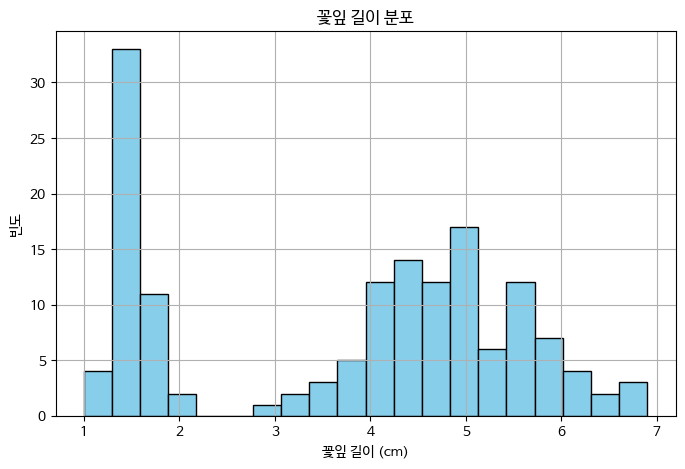

In [12]:
import matplotlib.pyplot as plt

# 꽃잎 길이 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(df['PetalLengthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

## 문제 10: 산점도 그리기
- 꽃잎 길이와 너비의 산점도도 그려보세요
- 길이가 길수록 너비도 넓어지는지 관찰해보세요

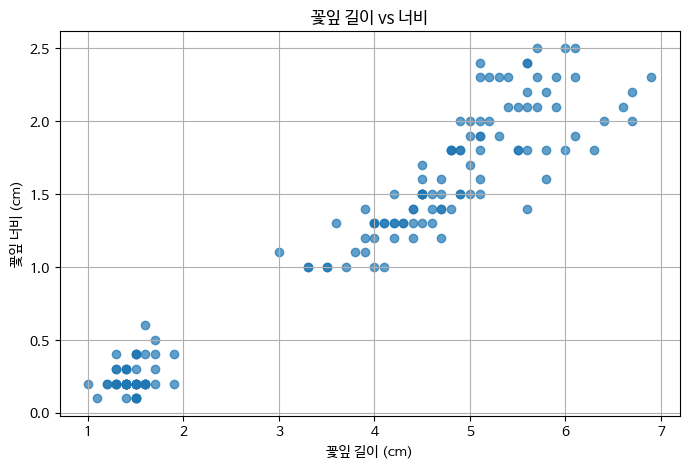

In [13]:
# 꽃잎 길이와 너비 산점도
plt.figure(figsize=(8, 5))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], alpha=0.7)
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.grid(True)
plt.show()

## 문제 11: 붓꽃 종류별로 다른 색깔로 산점도 그리기
- 어떤 종류가 가장 구별되어 보이나요?
- 서로 겹치는 종류가 있나요?

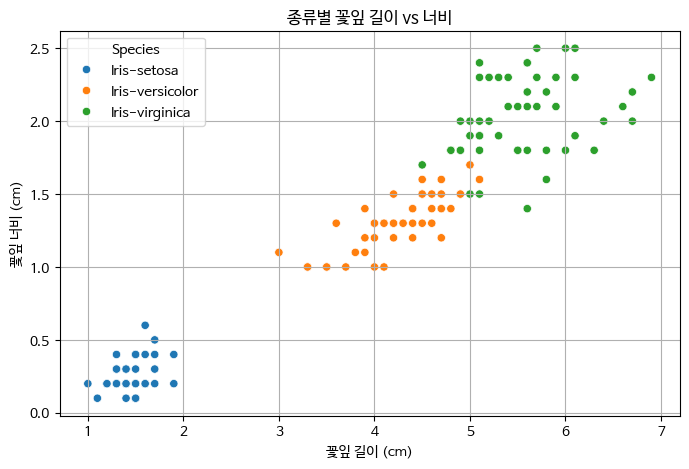

In [14]:
import seaborn as sns

# 붓꽃 종류별 색상 산점도
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('종류별 꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.grid(True)
plt.show()

## 문제 12: 종류별 평균 비교하기
- 어떤 종류가 꽃받침이 가장 긴가요?
- 어떤 종류가 꽃잎이 가장 넓은가요?
- 결과를 표로 정리해보세요

In [15]:
# 종류별 꽃받침 길이, 꽃잎 너비 평균
group_means = df.groupby('Species')[['SepalLengthCm', 'PetalWidthCm']].mean()
print("종류별 평균:")
print(group_means)

종류별 평균:
                 SepalLengthCm  PetalWidthCm
Species                                     
Iris-setosa              5.006         0.244
Iris-versicolor          5.936         1.326
Iris-virginica           6.588         2.026


## 문제 13: 막대그래프로 평균 비교하기
- 꽃잎 길이의 평균도 막대그래프로 그려보세요
- 가장 큰 차이를 보이는 측정값이 무엇인지 찾아보세요

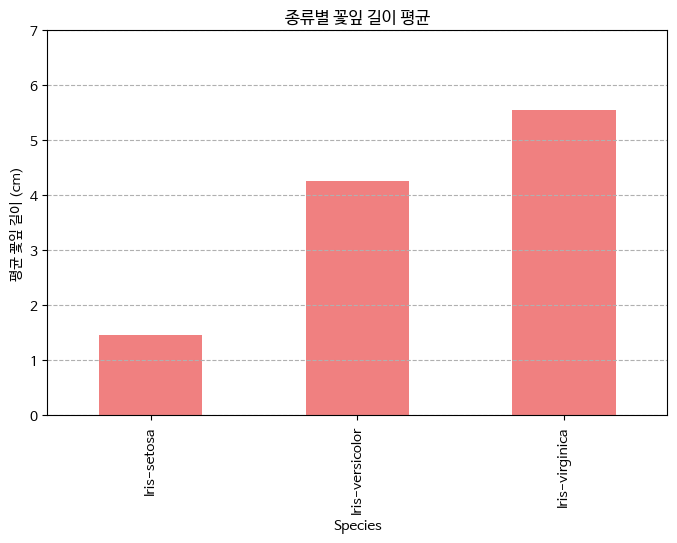

In [16]:
# 막대그래프: 꽃잎 길이 평균
group_petallength = df.groupby('Species')['PetalLengthCm'].mean()

plt.figure(figsize=(8, 5))
group_petallength.plot(kind='bar', color='lightcoral')
plt.title('종류별 꽃잎 길이 평균')
plt.ylabel('평균 꽃잎 길이 (cm)')
plt.xlabel('Species')
plt.ylim(0, 7)
plt.grid(axis='y', linestyle='--')
plt.show()

## 문제 14: 박스플롯으로 분포 비교하기
- 어떤 종류가 가장 넓은 범위의 값을 가지나요?
- 이상하게 튀는 값(점으로 표시)이 있나요?

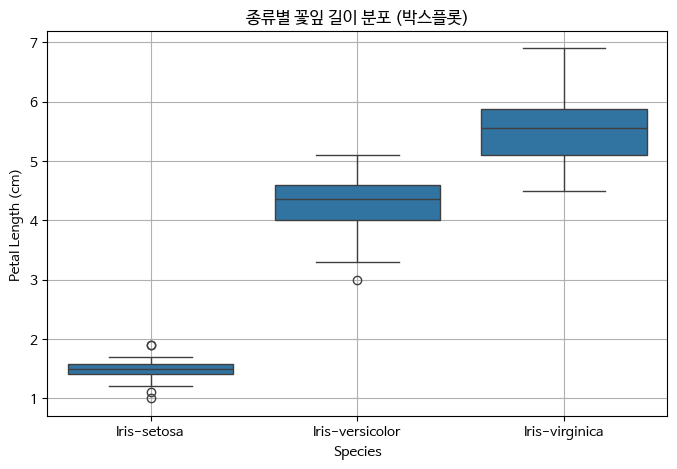

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 꽃잎 길이의 분포를 박스플롯으로 비교
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title('종류별 꽃잎 길이 분포 (박스플롯)')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

## 문제 15: 새로운 값 계산하기
- 어떤 종류가 꽃받침 면적이 가장 큰가요?
- 어떤 종류가 꽃잎 면적이 가장 큰가요?

In [18]:
# 꽃받침 면적(Sepal Area) = SepalLength × SepalWidth
df['SepalArea'] = df['SepalLengthCm'] * df['SepalWidthCm']

# 꽃잎 면적(Petal Area) = PetalLength × PetalWidth
df['PetalArea'] = df['PetalLengthCm'] * df['PetalWidthCm']

# 종류별 평균 면적 계산
area_means = df.groupby('Species')[['SepalArea', 'PetalArea']].mean()
print("종류별 평균 면적:")
print(area_means)

종류별 평균 면적:
                 SepalArea  PetalArea
Species                              
Iris-setosa        17.2088     0.3628
Iris-versicolor    16.5262     5.7204
Iris-virginica     19.6846    11.2962


## 문제 16: 데이터 필터링
- 꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터를 찾아보세요
- 그 데이터들은 주로 어떤 종류인가요?

In [19]:
# 조건: 꽃받침 너비 ≥ 3.0, 꽃잎 너비 ≥ 1.5
filtered = df[(df['SepalWidthCm'] >= 3.0) & (df['PetalWidthCm'] >= 1.5)]

# 필터링된 데이터의 종 분포
filtered_species = filtered['Species'].value_counts()
print("조건을 만족하는 데이터의 종 분포:")
print(filtered_species)

조건을 만족하는 데이터의 종 분포:
Species
Iris-virginica     29
Iris-versicolor    10
Name: count, dtype: int64


## 문제 17: 순위 매기기
- top 10에 가장 많이 포함된 종류는?
- 가장 적게 포함된 종류는?

In [20]:
# top 10개 중 어떤 종이 가장 많은가?
top10 = df.head(10)
top10_species = top10['Species'].value_counts()
print("상위 10개 중 가장 많이 포함된 종:")
print(top10_species)

# 전체 중 가장 적게 포함된 종
least_common = df['Species'].value_counts().idxmin()
print(f"가장 적게 포함된 종: {least_common}")

상위 10개 중 가장 많이 포함된 종:
Species
Iris-setosa    10
Name: count, dtype: int64
가장 적게 포함된 종: Iris-setosa
